In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
from sklearn.datasets import make_moons
X,target = make_moons(n_samples=100, noise=0.3)

In [104]:
df = pd.DataFrame(X)
df = pd.concat([pd.Series(1,index = df.index,name = "00"),df],axis = 1)

In [105]:
df.head()

,00,0,1
0,1,1.793205,-0.705240
1,1,0.273209,0.532332
2,1,2.132057,0.311702
3,1,-1.028000,0.446036
4,1,2.232401,-0.106904


In [106]:
y = pd.Series(target)

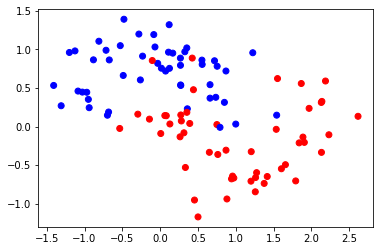

In [107]:
plt.scatter(X[:,0],X[:,1],c = y.map({1:'red',0:'blue'}))

In [108]:
def h_x(X,theta):
    z = X@theta
    return 1/(1+np.exp(-(z)))+0.000001

In [109]:
def cost_func(X,y,theta):
    y1 = h_x(X,theta)
    return -(1/X.shape[0])*np.sum(y*np.log(y1)+(1-y)*np.log(1-y1))

In [110]:
def train(X,Y,theta,alpha,epochs):
    m = X.shape[0]
    loss_matrix = []
    for epoch in range(epochs):
        h = h_x(X,theta)
        step = (1/m)*(X.T@(h-Y))
        theta = theta - (alpha*step)
        loss_matrix.append(cost_func(X,Y,theta))
    return loss_matrix,theta

In [111]:
theta = np.zeros((df.shape[1],1))
losses,the = train(df.values,target.reshape(-1,1),theta,0.1,500)

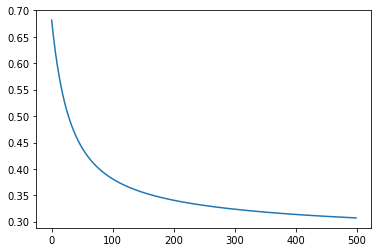

In [112]:
plt.plot(losses)

In [113]:
predicted_labels = h_x(df,the).values
for i in range(predicted_labels.shape[0]):
    if predicted_labels[i][0] >0.5:
        predicted_labels[i][0] = 1
    else:
        predicted_labels[i][0] = 0
predicted_labels =  predicted_labels.reshape(-1,)

#### Finding accuracy

In [114]:
acc = 0
acc = np.mean([y[i] == predicted_labels[i] for i in range(len(y))])
acc

0.85

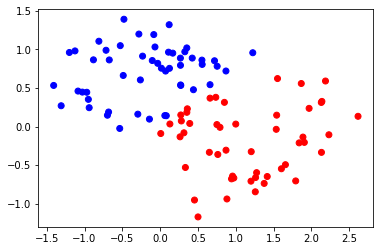

In [115]:
plt.scatter(X[:,0],X[:,1],c = pd.Series(predicted_labels).map({1:'red',0:'blue'}))

## Making a desition Boundary

In [116]:
W = the.reshape(-1,)
b = W[0]
W = W[1:]
print("Bias : {}\nWeights : {}".format(b,W))

Bias : 0.20812590829477398
Weights : [ 1.28230789 -2.7914191 ]


In [117]:
x2 = -(b + (W[0]/1)*df[0])/(W[1]/1)

Text(0.5, 1.0, 'On Predicted points')

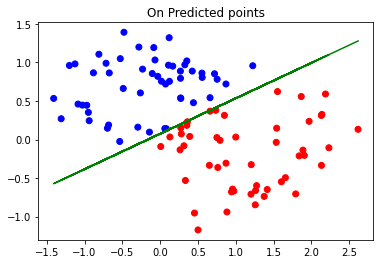

In [118]:
plt.scatter(df[0],df[1],c = pd.Series(predicted_labels).map({1:'red',0:'blue'}))
plt.plot(df[0],x2,c = "green")
plt.title("On Predicted points")

Text(0.5, 1.0, 'Actual labelling')

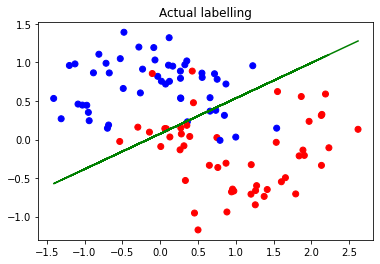

In [119]:
plt.scatter(X[:,0],X[:,1],c = y.map({1:'red',0:'blue'}))
plt.plot(df[0],x2,c = "green")
plt.title('Actual labelling')